# Lending Club Case Study

### Goal

Use EDA to analyze historical loan data to identify patterns and factors influencing loan defaulters 

### Problem Statement

Finance company faces two  risks
* Approving loans to likely defaulters
* Rejecting loans to reliable borrowers

In [36]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings

In [37]:
#Import loan data
loan_data=pd.read_csv('loan.csv',low_memory=False)

In [38]:
pd.set_option('display.max_columns',None) # set to display all columns

In [39]:
warnings.filterwarnings('ignore') 

### Remove headers footer summary rows if present 

In [40]:
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

No headers or empty rows  present

In [41]:
loan_data.tail()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,FiSite Research,4 years,MORTGAGE,110000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Our current gutter system on our home is old a...,home_improvement,Home Improvement,802xx,CO,11.33,0,Nov-90,0,0.0,0.0,13,0,7274,13.10%,40,f,0.0,0.0,2822.969293,1213.88,2500.0,322.97,0.0,0.0,0.0,Jul-10,80.90,NaN,Jun-10,NaN,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,"Squarewave Solutions, Ltd.",3 years,RENT,18000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,The rate of interest and fees incurred by carr...,credit_card,Retiring credit card debt,274xx,NC,6.40,1,Dec-86,1,5.0,0.0,6,0,8847,26.90%,9,f,0.0,0.0,9913.491822,1020.51,8500.0,1413.49,0.0,0.0,0.0,Jul-10,281.94,NaN,Jul-10,NaN,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,NaN,< 1 year,MORTGAGE,100000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,MBA Loan Consolidation,017xx,MA,2.30,0,Oct-98,0,0.0,0.0,11,0,9698,19.40%,20,f,0.0,0.0,5272.161128,1397.12,5000.0,272.16,0.0,0.0,0.0,Apr-08,0.00,NaN,Jun-07,NaN,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,NaN,< 1 year,MORTGAGE,200000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,other,JAL Loan,208xx,MD,3.72,0,Nov-88,0,0.0,0.0,17,0,85607,0.70%,26,f,0.0,0.0,5174.198551,672.66,5000.0,174.20,0.0,0.0,0.0,Jan-08,0.00,NaN,Jun-07,NaN,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

No footers or summary rows present

In [42]:
loan_data.shape

(39717, 111)

so laon_data has 

row count : 39717 


Column count: 111

### Cleaning Data

In [43]:
# identifying null percentage column wise
null_percentage_column=loan_data.isnull().mean()*100

In [44]:
null_percentage_column.describe()

count    111.000000
mean      51.339942
std       49.616685
min        0.000000
25%        0.000000
50%       92.985372
75%      100.000000
max      100.000000
dtype: float64

from above we can see around 75% of the columns have 100%  null values , and 50% have 92 percentage null value 

In [45]:
print(null_percentage_column)

id                              0.000000
member_id                       0.000000
loan_amnt                       0.000000
funded_amnt                     0.000000
funded_amnt_inv                 0.000000
                                 ...    
tax_liens                       0.098195
tot_hi_cred_lim               100.000000
total_bal_ex_mort             100.000000
total_bc_limit                100.000000
total_il_high_credit_limit    100.000000
Length: 111, dtype: float64


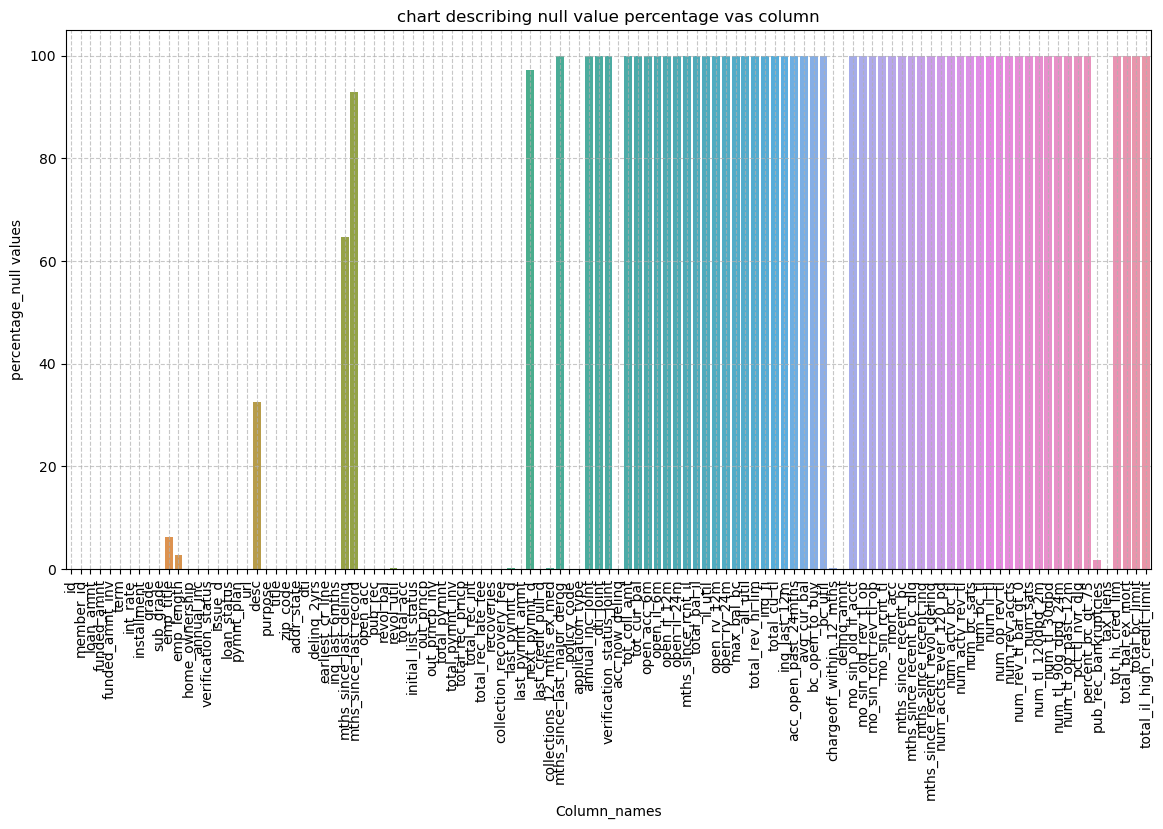

In [46]:
#let us plot a  bar chart to display it better
plt.figure(figsize=(14,7))
sns.barplot(x=null_percentage_column.index, y=null_percentage_column.values)
plt.xticks(rotation=90)
plt.xlabel("Column_names")
plt.ylabel("percentage_null values")
plt.title("chart describing null value percentage vas column")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [47]:
#all these columns with 50%+ null values can be dropped as it is not having significance in our analysis 
Column_full_null=null_percentage_column[null_percentage_column>50].index
#Column_full_null
loan_data.drop(Column_full_null,axis=1,inplace=True)

In [48]:
loan_data.isnull().mean()*100

id                             0.000000
member_id                      0.000000
loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      6.191303
emp_length                     2.706650
home_ownership                 0.000000
annual_inc                     0.000000
verification_status            0.000000
issue_d                        0.000000
loan_status                    0.000000
pymnt_plan                     0.000000
url                            0.000000
desc                          32.585543
purpose                        0.000000
title                          0.027696
zip_code                       0.000000
addr_state                     0.000000
dti                            0.000000


In [49]:
loan_data.shape

(39717, 54)

In [54]:
#remaining Columns with missing values 
Columns_null_values=loan_data.isnull().mean()*100
Column_with_null_percentage=Columns_null_values[Columns_null_values>0]
print(Column_with_null_percentage)
columns_null=Columns_null_values[Columns_null_values>0].index
print(columns_null)

emp_title                      6.191303
emp_length                     2.706650
desc                          32.585543
title                          0.027696
revol_util                     0.125891
last_pymnt_d                   0.178765
last_credit_pull_d             0.005036
collections_12_mths_ex_med     0.140998
chargeoff_within_12_mths       0.140998
pub_rec_bankruptcies           1.754916
tax_liens                      0.098195
dtype: float64
Index(['emp_title', 'emp_length', 'desc', 'title', 'revol_util',
       'last_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'chargeoff_within_12_mths', 'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')


In [55]:
loan_data.shape

(39717, 54)

In [56]:
loan_data.nunique()

id                            39717
member_id                     39717
loan_amnt                       885
funded_amnt                    1041
funded_amnt_inv                8205
term                              2
int_rate                        371
installment                   15383
grade                             7
sub_grade                        35
emp_title                     28820
emp_length                       11
home_ownership                    5
annual_inc                     5318
verification_status               3
issue_d                          55
loan_status                       3
pymnt_plan                        1
url                           39717
desc                          26526
purpose                          14
title                         19615
zip_code                        823
addr_state                       50
dti                            2868
delinq_2yrs                      11
earliest_cr_line                526
inq_last_6mths              

* coulmns with 1 unique values*

In [58]:
clms_with_1_unique=loan_data.loc[:,loan_data.nunique()==1].columns
print(clms_with_1_unique)

Index(['pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med',
       'policy_code', 'application_type', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens'],
      dtype='object')


In [59]:
loan_data.drop(clms_with_1_unique,axis=1,inplace=True)

In [60]:
loan_data.shape

(39717, 45)

In [61]:
loan_data['loan_status'].value_counts()

loan_status
Fully Paid     32950
Charged Off     5627
Current         1140
Name: count, dtype: int64

* current is not having any relevance in analysis and can be dropped those raws

In [62]:
loan_data=loan_data[loan_data["loan_status"]!="Current"]

In [63]:
loan_data.shape

(38577, 45)

In [65]:
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.50%,10,0.0,0.0,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,0.0,0.0,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,NaN,wedding,My wedding loan I promise to pay back,852xx,AZ,11.20,0,Nov-04,3,9,0,7963,28.30%,12,0.0,0.0,5632.210000,5632.21,5000.00,632.21,0.00,0.00,0.00,Jan-15,161.03,Jan-16,0.0


In [66]:
loan_data.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies'],
      dtype='object')

*there are columns  for which values we have no use.

In [67]:
columns_remove= [
    "funded_amnt",
    "last_pymnt_d",
    "earliest_cr_line",
    "desc",
    "title",
    "emp_title",
    "zip_code",
    "last_credit_pull_d",
    "out_prncp",
    "total_pymnt",
    "total_rec_prncp",
    "total_rec_int",
    "last_pymnt_amnt",
    "url",
    'id', 
    'member_id']

In [68]:
loan_data.drop(columns=columns_remove, inplace=True)

In [70]:
loan_data

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp_inv,total_pymnt_inv,total_rec_late_fee,recoveries,collection_recovery_fee,pub_rec_bankruptcies
0,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,0,1,3,0,13648,83.70%,9,0.0,5833.84,0.00,0.00,0.00,0.0
1,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,GA,1.00,0,5,3,0,1687,9.40%,4,0.0,1008.71,0.00,117.08,1.11,0.0
2,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72,0,2,2,0,2956,98.50%,10,0.0,3005.67,0.00,0.00,0.00,0.0
3,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,CA,20.00,0,1,10,0,5598,21%,37,0.0,12231.89,16.97,0.00,0.00,0.0
5,5000,5000.0,36 months,7.90%,156.46,A,A4,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,AZ,11.20,0,3,9,0,7963,28.30%,12,0.0,5632.21,0.00,0.00,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,2500,1075.0,36 months,8.07%,78.42,A,A4,4 years,MORTGAGE,110000.0,Not Verified,Jul-07,Fully Paid,home_improvement,CO,11.33,0,0,13,0,7274,13.10%,40,0.0,1213.88,0.00,0.00,0.00,NaN
39713,8500,875.0,36 months,10.28%,275.38,C,C1,3 years,RENT,18000.0,Not Verified,Jul-07,Fully Paid,credit_card,NC,6.40,1,1,6,0,8847,26.90%,9,0.0,1020.51,0.00,0.00,0.00,NaN
39714,5000,1325.0,36 months,8.07%,156.84,A,A4,< 1 year,MORTGAGE,100000.0,Not Verified,Jul-07,Fully Paid,debt_consolidation,MA,2.30,0,0,11,0,9698,19.40%,20,0.0,1397.12,0.00,0.00,0.00,NaN
39715,5000,650.0,36 months,7.43%,155.38,A,A2,< 1 year,MORTGAGE,200000.0,Not Verified,Jul-07,Fully Paid,other,MD,3.72,0,0,17,0,85607,0.70%,26,0.0,672.66,0.00,0.00,0.00,NaN


In [72]:
loan_data.dtypes

loan_amnt                    int64
funded_amnt_inv            float64
term                        object
int_rate                    object
installment                float64
grade                       object
sub_grade                   object
emp_length                  object
home_ownership              object
annual_inc                 float64
verification_status         object
issue_d                     object
loan_status                 object
purpose                     object
addr_state                  object
dti                        float64
delinq_2yrs                  int64
inq_last_6mths               int64
open_acc                     int64
pub_rec                      int64
revol_bal                    int64
revol_util                  object
total_acc                    int64
out_prncp_inv              float64
total_pymnt_inv            float64
total_rec_late_fee         float64
recoveries                 float64
collection_recovery_fee    float64
pub_rec_bankruptcies

we need to correct data types and content for column term,emp_length,int_rate,dti,issue_d 

In [73]:
loan_data['term']=pd.to_numeric(loan_data['term'].apply(lambda x: x.split(" ")[1]))

In [76]:
loan_data.term.dtypes

dtype('int64')

In [77]:
loan_data['emp_length']=loan_data['emp_length'].str.replace("years","").str.replace("year","").str.replace("+","").str.replace("<","").str.strip()

In [79]:
loan_data.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp_inv,total_pymnt_inv,total_rec_late_fee,recoveries,collection_recovery_fee,pub_rec_bankruptcies
0,5000,4975.0,36,10.65%,162.87,B,B2,10,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,0,1,3,0,13648,83.70%,9,0.0,5833.84,0.00,0.00,0.00,0.0
1,2500,2500.0,60,15.27%,59.83,C,C4,1,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,GA,1.00,0,5,3,0,1687,9.40%,4,0.0,1008.71,0.00,117.08,1.11,0.0
2,2400,2400.0,36,15.96%,84.33,C,C5,10,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72,0,2,2,0,2956,98.50%,10,0.0,3005.67,0.00,0.00,0.00,0.0
3,10000,10000.0,36,13.49%,339.31,C,C1,10,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,CA,20.00,0,1,10,0,5598,21%,37,0.0,12231.89,16.97,0.00,0.00,0.0
5,5000,5000.0,36,7.90%,156.46,A,A4,3,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,AZ,11.20,0,3,9,0,7963,28.30%,12,0.0,5632.21,0.00,0.00,0.00,0.0


In [81]:
loan_data['int_rate'] = pd.to_numeric(loan_data['int_rate'].apply(lambda x: x.split('%')[0]))
loan_data['int_rate']=loan_data['int_rate'].apply(lambda x: round(x,2))

In [82]:
loan_data['int_rate'].value_counts()

int_rate
10.99    913
11.49    790
7.51     787
13.49    749
7.88     725
        ... 
16.96      1
18.36      1
16.15      1
16.01      1
16.20      1
Name: count, Length: 370, dtype: int64

In [83]:
loan_data['issue_d'] = pd.to_datetime(loan_data.issue_d, format='%b-%y')
loan_data['issue_d']

0       2011-12-01
1       2011-12-01
2       2011-12-01
3       2011-12-01
5       2011-12-01
           ...    
39712   2007-07-01
39713   2007-07-01
39714   2007-07-01
39715   2007-07-01
39716   2007-06-01
Name: issue_d, Length: 38577, dtype: datetime64[ns]

* creating month and year column from issue_d

In [84]:
loan_data['issue_year'] = pd.DatetimeIndex(loan_data['issue_d']).year
loan_data['issue_month'] = pd.DatetimeIndex(loan_data['issue_d']).month

* Revol_util: This column represents the borrower's revolving credit utilization.
* Pub_rec_bankruptcies: This column indicates the number of public record bankruptcies.
these two columns can be dropped as this cant give much inference

In [90]:
#loan_data.head()
columns_to_drop=['revol_util','pub_rec_bankruptcies']
loan_data.drop(columns=columns_to_drop, inplace=True)

### last check for missing values 


In [93]:
missing_values_percentage = (loan_data.isnull().mean() * 100).round(2)
print(missing_values_percentage)

loan_amnt                  0.00
funded_amnt_inv            0.00
term                       0.00
int_rate                   0.00
installment                0.00
grade                      0.00
sub_grade                  0.00
emp_length                 2.68
home_ownership             0.00
annual_inc                 0.00
verification_status        0.00
issue_d                    0.00
loan_status                0.00
purpose                    0.00
addr_state                 0.00
dti                        0.00
delinq_2yrs                0.00
inq_last_6mths             0.00
open_acc                   0.00
pub_rec                    0.00
revol_bal                  0.00
total_acc                  0.00
out_prncp_inv              0.00
total_pymnt_inv            0.00
total_rec_late_fee         0.00
recoveries                 0.00
collection_recovery_fee    0.00
issue_year                 0.00
issue_month                0.00
dtype: float64


In [96]:
loan_data.emp_length.describe

<bound method NDFrame.describe of 0        10
1         1
2        10
3        10
5         3
         ..
39712     4
39713     3
39714     1
39715     1
39716     1
Name: emp_length, Length: 38577, dtype: object>

In [97]:
loan_data['emp_length'].fillna(loan_data['emp_length'].mode()[0], inplace=True)
loan_data['emp_length']=loan_data['emp_length'].astype("int")

In [98]:
print(loan_data.home_ownership.value_counts)

<bound method IndexOpsMixin.value_counts of 0            RENT
1            RENT
2            RENT
3            RENT
5            RENT
           ...   
39712    MORTGAGE
39713        RENT
39714    MORTGAGE
39715    MORTGAGE
39716         OWN
Name: home_ownership, Length: 38577, dtype: object>


In [99]:
print(loan_data['home_ownership'].value_counts())

home_ownership
RENT        18480
MORTGAGE    17021
OWN          2975
OTHER          98
NONE            3
Name: count, dtype: int64


In [102]:
#replace the NONE values with mode value
loan_data['home_ownership'] = loan_data['home_ownership'].replace('NONE', np.nan)
mode_home_ownership = loan_data['home_ownership'].mode()[0]
loan_data['home_ownership'].fillna(mode_home_ownership, inplace=True)

In [103]:
print(loan_data['home_ownership'].value_counts())

home_ownership
RENT        18483
MORTGAGE    17021
OWN          2975
OTHER          98
Name: count, dtype: int64


In [ ]:
#get the columns based on data types

In [104]:
numerical_columns = loan_data.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_columns = loan_data.select_dtypes(include=['object']).columns.tolist()
datetime_columns = loan_data.select_dtypes(include=['datetime64']).columns.tolist()

In [106]:
print("numerical_columns:", numerical_columns)

numerical_columns: ['loan_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'total_acc', 'out_prncp_inv', 'total_pymnt_inv', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee']


In [107]:
print('categorical_columns:',categorical_columns)

categorical_columns: ['grade', 'sub_grade', 'home_ownership', 'verification_status', 'loan_status', 'purpose', 'addr_state']


In [108]:
print('datetime_columns:',datetime_columns)

datetime_columns: ['issue_d']


In [ ]:
#Columns can also be used for categorical :issue_year,issue_month,delinq_2yrs,inq_last_6mths,pub_rec,term  , convert it to object type

In [111]:
columns_to_object =['issue_year','issue_month','delinq_2yrs','inq_last_6mths','pub_rec','term']
for col in columns_to_object:
    loan_data[col]=loan_data[col].astype('object')

In [112]:
numerical_columns = loan_data.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_columns = loan_data.select_dtypes(include=['object']).columns.tolist()
datetime_columns = loan_data.select_dtypes(include=['datetime64']).columns.tolist()
print("numerical_columns:", numerical_columns)
print('categorical_columns:',categorical_columns)
print('datetime_columns:',datetime_columns)



numerical_columns: ['loan_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc', 'dti', 'open_acc', 'revol_bal', 'total_acc', 'out_prncp_inv', 'total_pymnt_inv', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee']
categorical_columns: ['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status', 'loan_status', 'purpose', 'addr_state', 'delinq_2yrs', 'inq_last_6mths', 'pub_rec', 'issue_year', 'issue_month']
datetime_columns: ['issue_d']


Value counts for term:
term
36    29096
60     9481
Name: count, dtype: int64



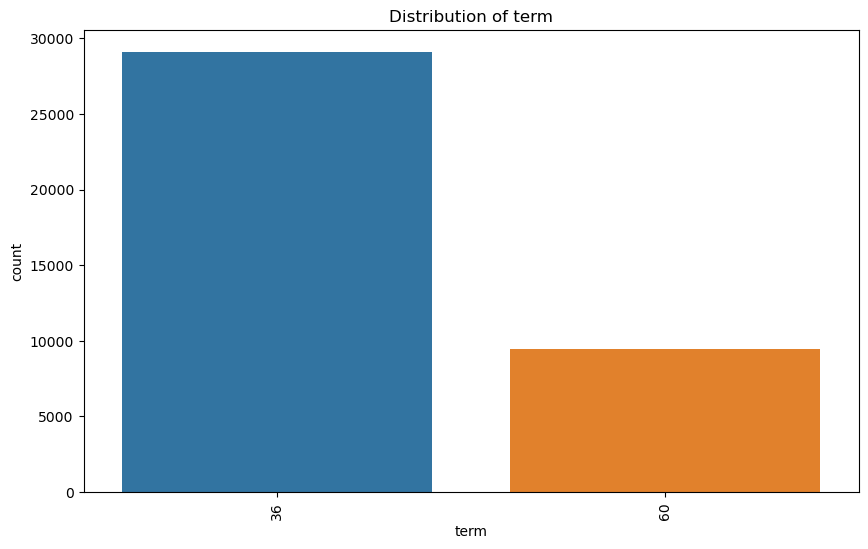

Value counts for grade:
grade
B    11675
A    10045
C     7834
D     5085
E     2663
F      976
G      299
Name: count, dtype: int64



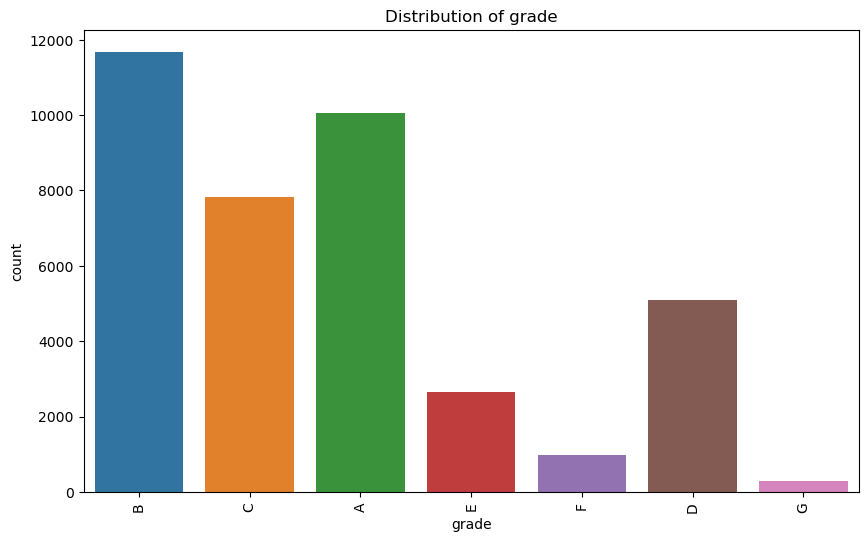

Value counts for sub_grade:
sub_grade
A4    2873
B3    2825
A5    2715
B5    2615
B4    2437
C1    2055
B2    2001
C2    1931
A3    1810
B1    1797
A2    1508
C3    1488
D2    1286
C4    1206
C5    1154
A1    1139
D3    1116
D1     931
D4     918
D5     834
E1     722
E2     614
E3     516
E4     424
E5     387
F1     305
F2     233
F3     174
F4     151
F5     113
G1      94
G2      77
G4      54
G3      45
G5      29
Name: count, dtype: int64



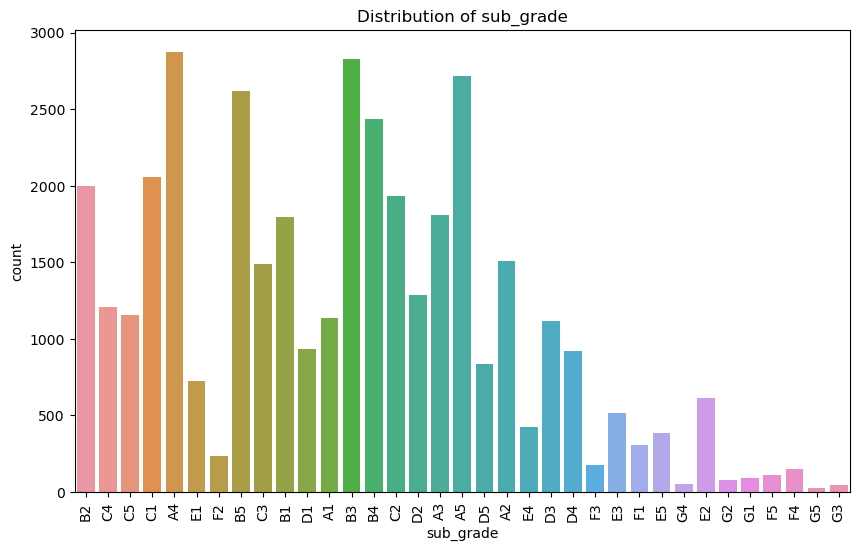

Value counts for home_ownership:
home_ownership
RENT        18483
MORTGAGE    17021
OWN          2975
OTHER          98
Name: count, dtype: int64



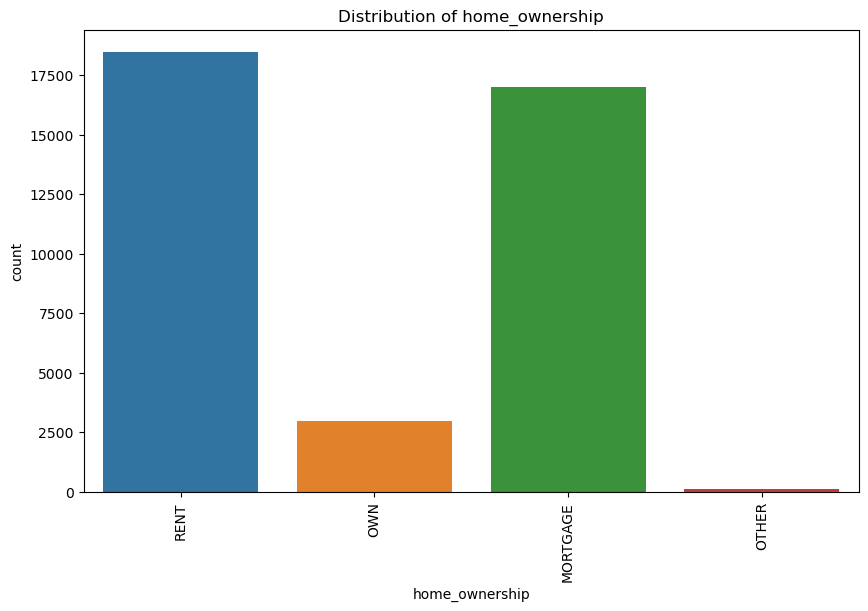

Value counts for verification_status:
verification_status
Not Verified       16694
Verified           12206
Source Verified     9677
Name: count, dtype: int64



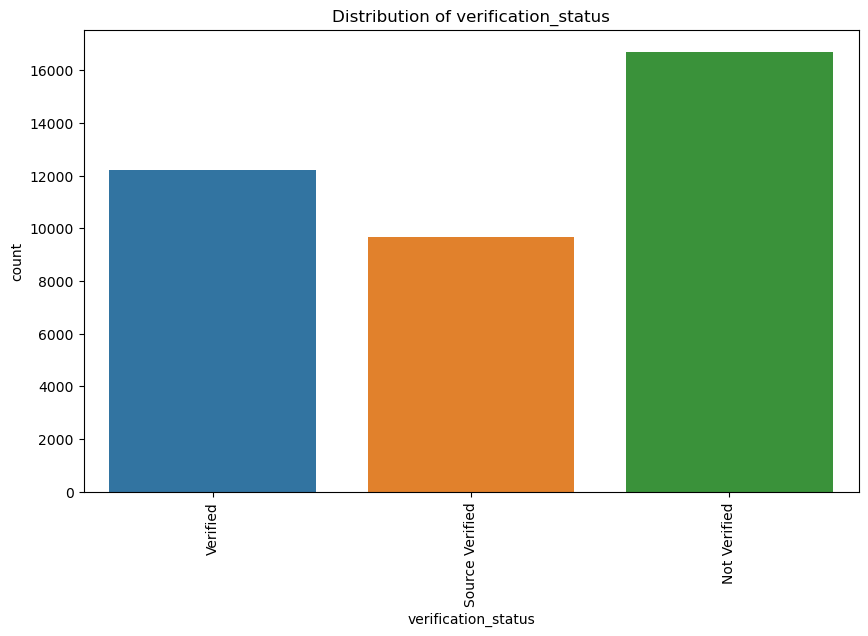

Value counts for loan_status:
loan_status
Fully Paid     32950
Charged Off     5627
Name: count, dtype: int64



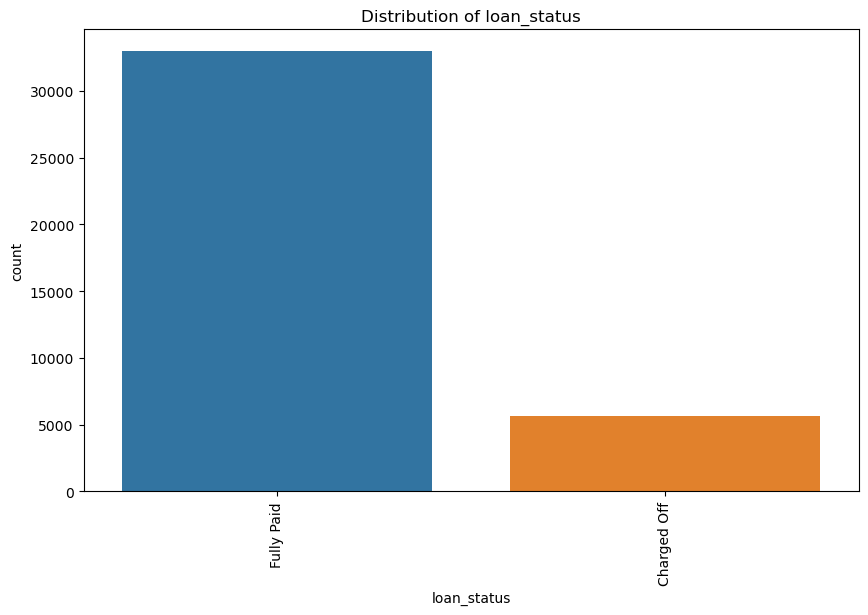

Value counts for purpose:
purpose
debt_consolidation    18055
credit_card            5027
other                  3865
home_improvement       2875
major_purchase         2150
small_business         1754
car                    1499
wedding                 926
medical                 681
moving                  576
vacation                375
house                   367
educational             325
renewable_energy        102
Name: count, dtype: int64



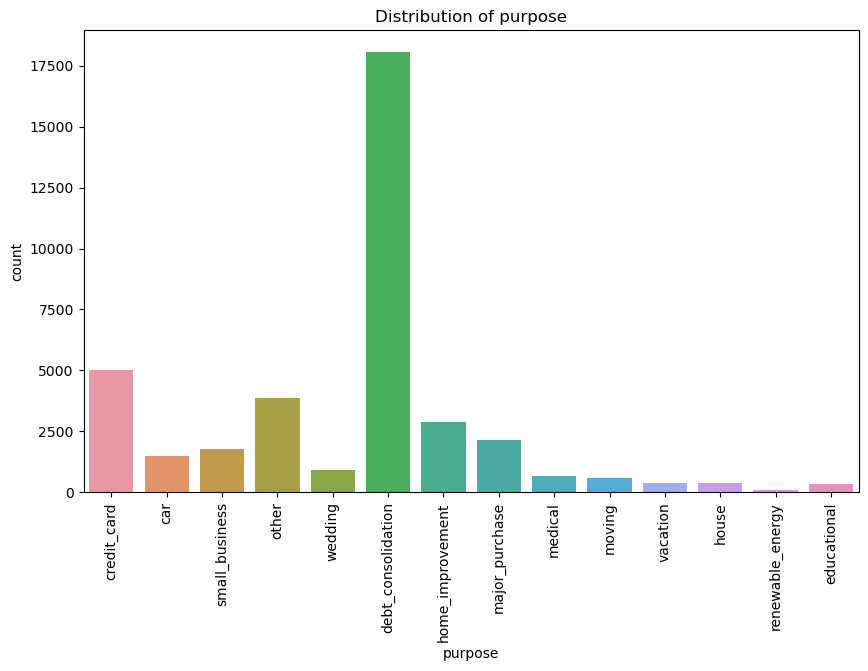

Value counts for addr_state:
addr_state
CA    6949
NY    3698
FL    2781
TX    2659
NJ    1790
IL    1478
PA    1468
VA    1369
GA    1359
MA    1297
OH    1178
MD    1023
AZ     849
WA     818
CO     766
NC     750
CT     726
MI     704
MO     670
MN     605
NV     479
SC     459
WI     440
AL     435
OR     435
LA     427
KY     311
OK     287
KS     255
UT     252
AR     235
DC     211
RI     194
NM     183
WV     172
NH     166
HI     166
DE     113
MT      83
WY      80
AK      78
SD      62
VT      53
MS      19
TN      17
IN       9
ID       6
IA       5
NE       5
ME       3
Name: count, dtype: int64



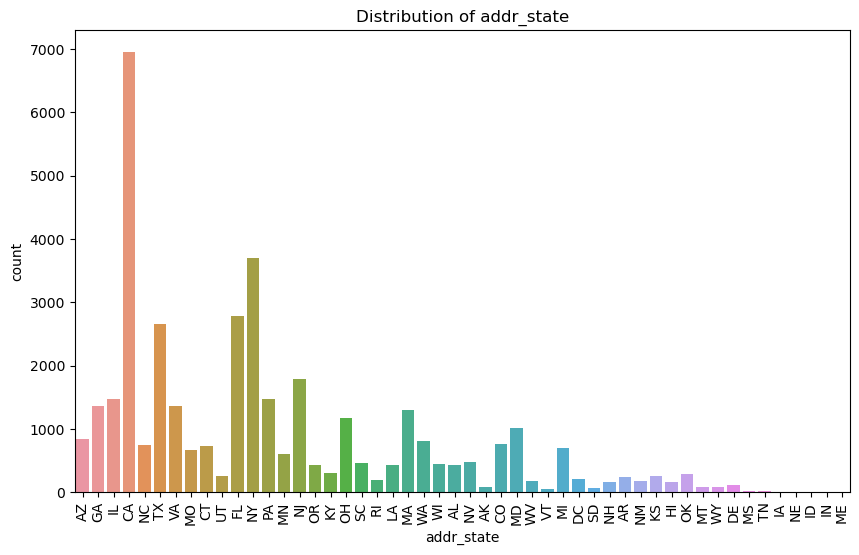

Value counts for delinq_2yrs:
delinq_2yrs
0     34386
1      3207
2       673
3       212
4        60
5        21
6        10
7         4
8         2
9         1
11        1
Name: count, dtype: int64



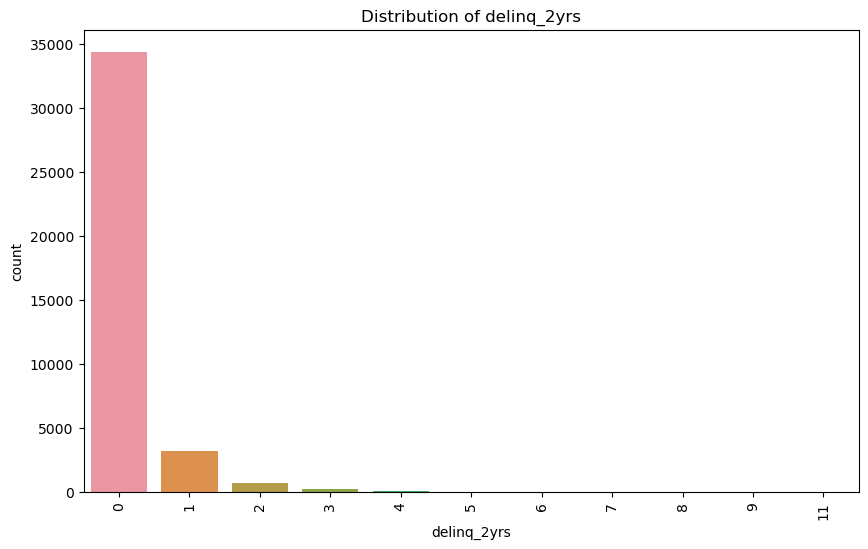

Value counts for inq_last_6mths:
inq_last_6mths
0    18709
1    10660
2     5654
3     2983
4      316
5      144
6       63
7       34
8       14
Name: count, dtype: int64



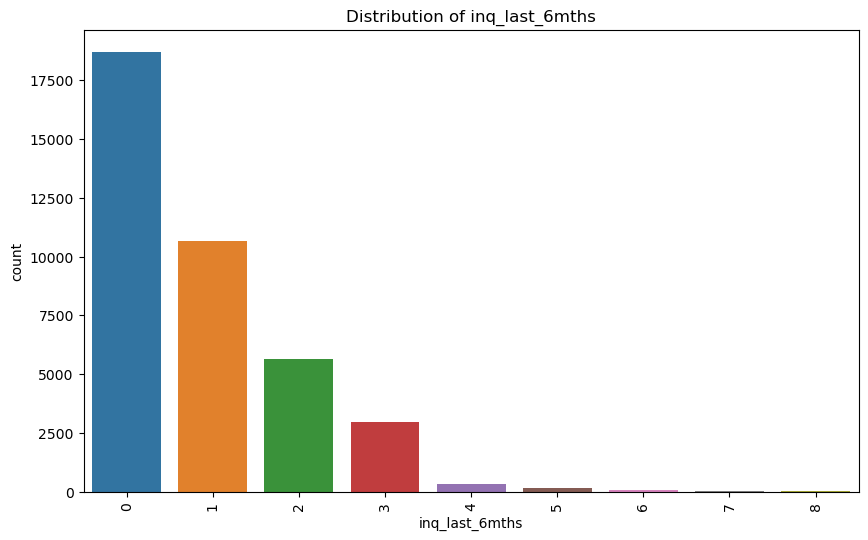

Value counts for pub_rec:
pub_rec
0    36507
1     2013
2       48
3        7
4        2
Name: count, dtype: int64



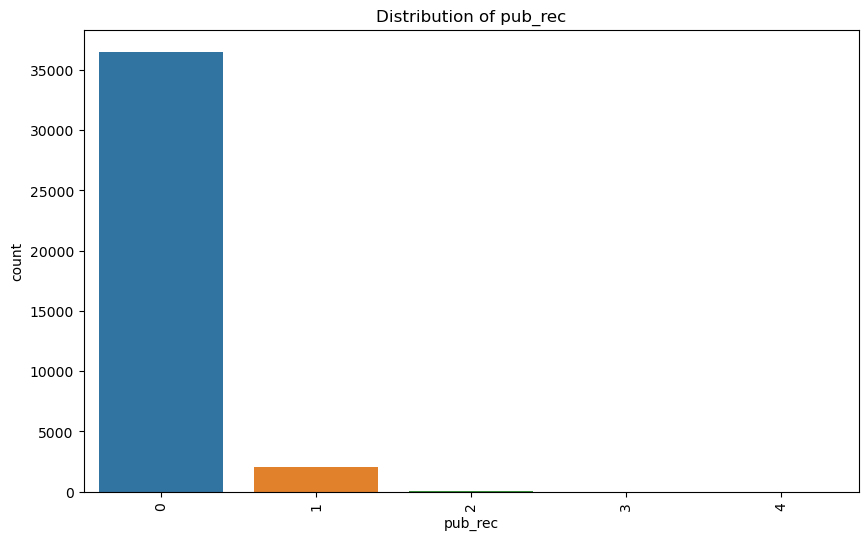

Value counts for issue_year:
issue_year
2011    20516
2010    11532
2009     4716
2008     1562
2007      251
Name: count, dtype: int64



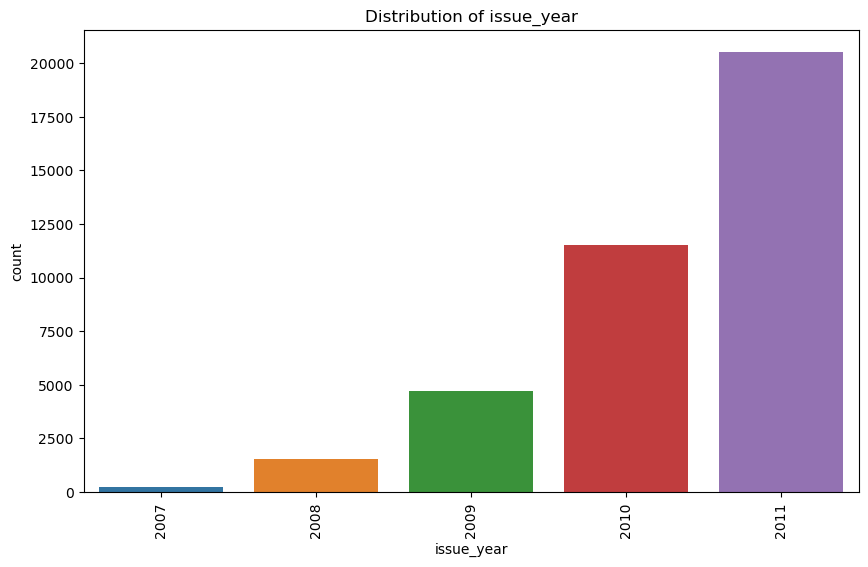

Value counts for issue_month:
issue_month
12    4215
11    4006
10    3761
9     3498
8     3388
7     3351
6     3180
5     2919
4     2831
3     2691
1     2379
2     2358
Name: count, dtype: int64



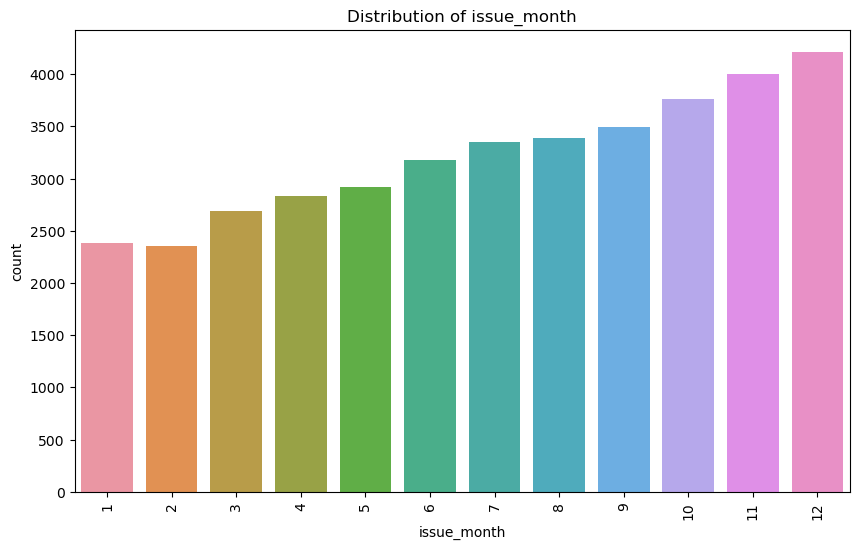

In [115]:
# lets do univeriate analysis on categorical column 
for col in categorical_columns:
    value= loan_data[col].value_counts()
    print(f"Value counts for {col}:")
    print(value)
    print()
    plt.figure(figsize=(10, 6))
    sns.countplot(data=loan_data, x=col)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=90)
    plt.show()
    

Statistics for loan_amnt:
count    38577.000000
mean     11047.025430
std       7348.441646
min        500.000000
25%       5300.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64




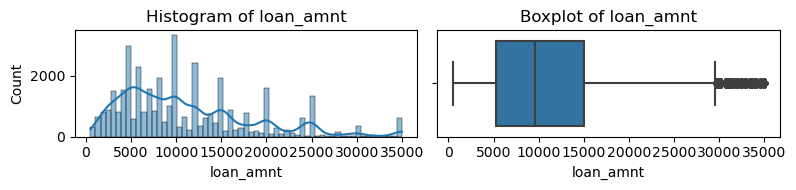

Statistics for funded_amnt_inv:
count    38577.000000
mean     10222.481123
std       7022.720644
min          0.000000
25%       5000.000000
50%       8733.440000
75%      14000.000000
max      35000.000000
Name: funded_amnt_inv, dtype: float64




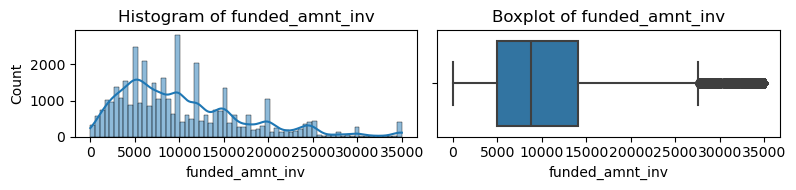

Statistics for int_rate:
count    38577.000000
mean        11.932219
std          3.691327
min          5.420000
25%          8.940000
50%         11.710000
75%         14.380000
max         24.400000
Name: int_rate, dtype: float64




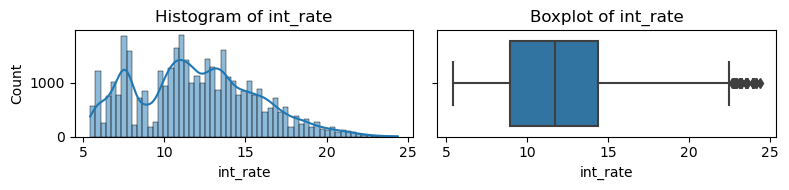

Statistics for installment:
count    38577.000000
mean       322.466318
std        208.639215
min         15.690000
25%        165.740000
50%        277.860000
75%        425.550000
max       1305.190000
Name: installment, dtype: float64




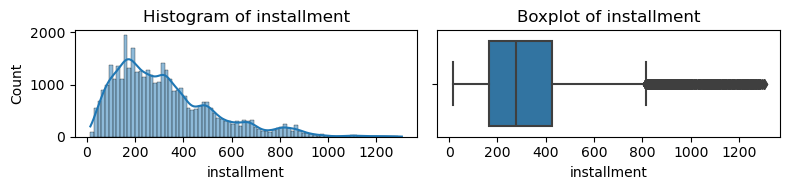

Statistics for annual_inc:
count    3.857700e+04
mean     6.877797e+04
std      6.421868e+04
min      4.000000e+03
25%      4.000000e+04
50%      5.886800e+04
75%      8.200000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64




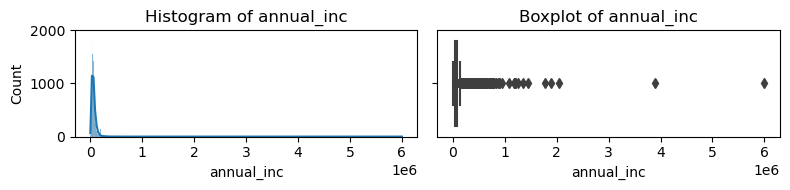

Statistics for dti:
count    38577.000000
mean        13.272727
std          6.673044
min          0.000000
25%          8.130000
50%         13.370000
75%         18.560000
max         29.990000
Name: dti, dtype: float64




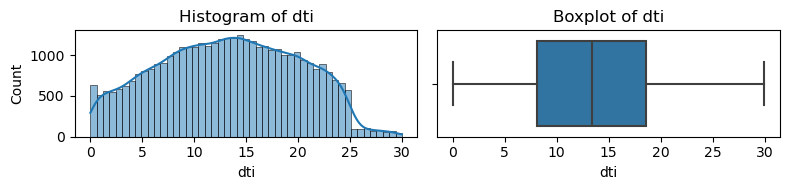

Statistics for open_acc:
count    38577.000000
mean         9.275423
std          4.401588
min          2.000000
25%          6.000000
50%          9.000000
75%         12.000000
max         44.000000
Name: open_acc, dtype: float64




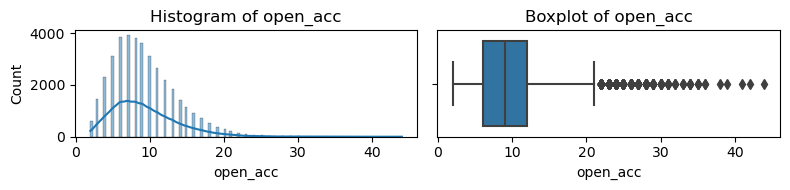

Statistics for revol_bal:
count     38577.000000
mean      13289.489826
std       15866.492241
min           0.000000
25%        3650.000000
50%        8762.000000
75%       16912.000000
max      149588.000000
Name: revol_bal, dtype: float64




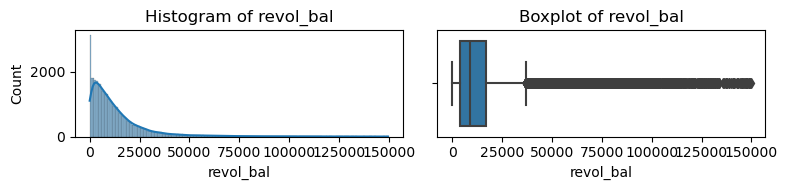

Statistics for total_acc:
count    38577.000000
mean        22.052648
std         11.425861
min          2.000000
25%         13.000000
50%         20.000000
75%         29.000000
max         90.000000
Name: total_acc, dtype: float64




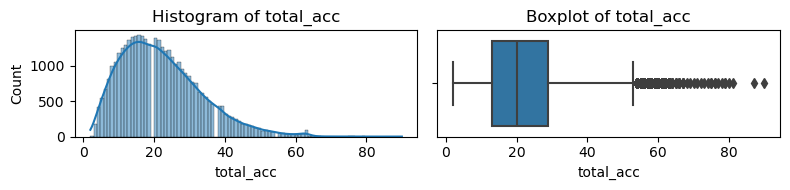

Statistics for out_prncp_inv:
count    38577.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: out_prncp_inv, dtype: float64




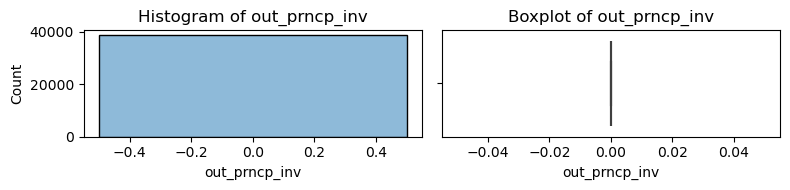

Statistics for total_pymnt_inv:
count    38577.000000
mean     11271.196153
std       8700.845592
min          0.000000
25%       5019.590000
50%       9066.660000
75%      15329.780000
max      58563.680000
Name: total_pymnt_inv, dtype: float64




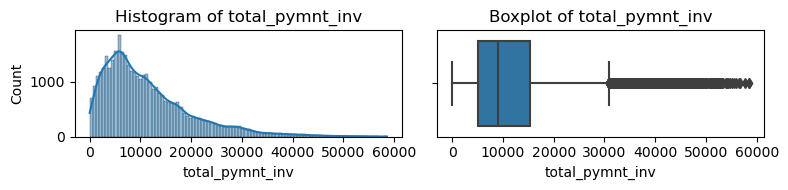

Statistics for total_rec_late_fee:
count    38577.000000
mean         1.368634
std          7.315880
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        180.200000
Name: total_rec_late_fee, dtype: float64




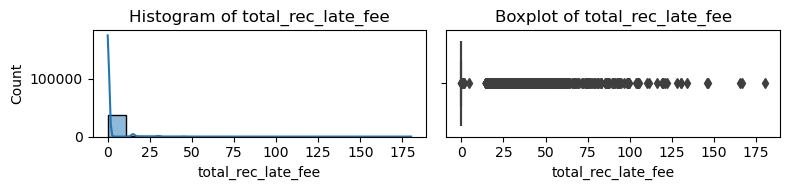

Statistics for recoveries:
count    38577.000000
mean        98.035545
std        698.650182
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      29623.350000
Name: recoveries, dtype: float64




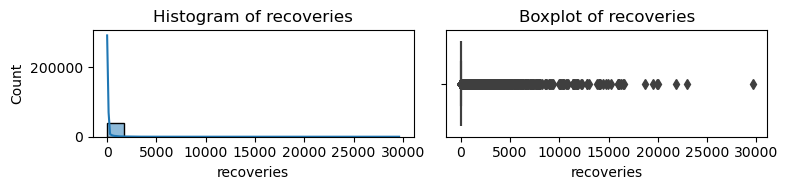

Statistics for collection_recovery_fee:
count    38577.000000
mean        12.772728
std        150.836853
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       7002.190000
Name: collection_recovery_fee, dtype: float64




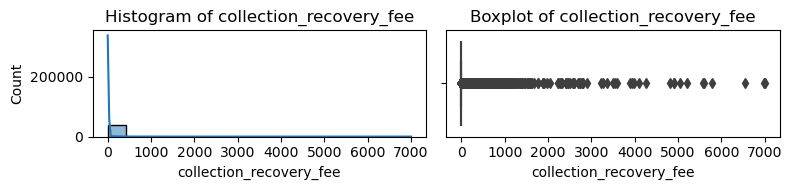

In [117]:
# lets do univeriate analysis on  numerical column
for column in numerical_columns:
    print(f"Statistics for {column}:")
    statistics = loan_data[column].describe()
    print(statistics)
    print("\n")
    fig, axes = plt.subplots(1, 2, figsize=(8, 2))
    sns.histplot(loan_data[column], ax=axes[0], kde=True)
    axes[0].set_title(f"Histogram of {column}")  
    sns.boxplot(x=loan_data[column], ax=axes[1])
    axes[1].set_title(f"Boxplot of {column}")  
    plt.tight_layout()
    plt.show()
    

In [130]:
loan_data.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,out_prncp_inv,total_pymnt_inv,total_rec_late_fee,recoveries,collection_recovery_fee,issue_year,issue_month
0,5000,4975.0,36,10.65,162.87,B,2,10,RENT,24000.0,Verified,2011-12-01,Fully Paid,credit_card,AZ,27.65,0,1,3,0,13648,9,0.0,5833.84,0.00,0.00,0.00,2011,12
1,2500,2500.0,60,15.27,59.83,C,4,1,RENT,30000.0,Source Verified,2011-12-01,Charged Off,car,GA,1.00,0,5,3,0,1687,4,0.0,1008.71,0.00,117.08,1.11,2011,12
2,2400,2400.0,36,15.96,84.33,C,5,10,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,small_business,IL,8.72,0,2,2,0,2956,10,0.0,3005.67,0.00,0.00,0.00,2011,12
3,10000,10000.0,36,13.49,339.31,C,1,10,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,other,CA,20.00,0,1,10,0,5598,37,0.0,12231.89,16.97,0.00,0.00,2011,12
5,5000,5000.0,36,7.90,156.46,A,4,3,RENT,36000.0,Source Verified,2011-12-01,Fully Paid,wedding,AZ,11.20,0,3,9,0,7963,12,0.0,5632.21,0.00,0.00,0.00,2011,12


 # Analysis and observations 

* Univerivative analysis on grade and sub_grade
  

In [137]:
# keep the subgrade as numeric
loan_data.sub_grade = loan_data.sub_grade.apply(lambda x : x[-1])
loan_data['sub_grade'].value_counts()


sub_grade
4    8063
3    7974
5    7847
2    7650
1    7043
Name: count, dtype: int64

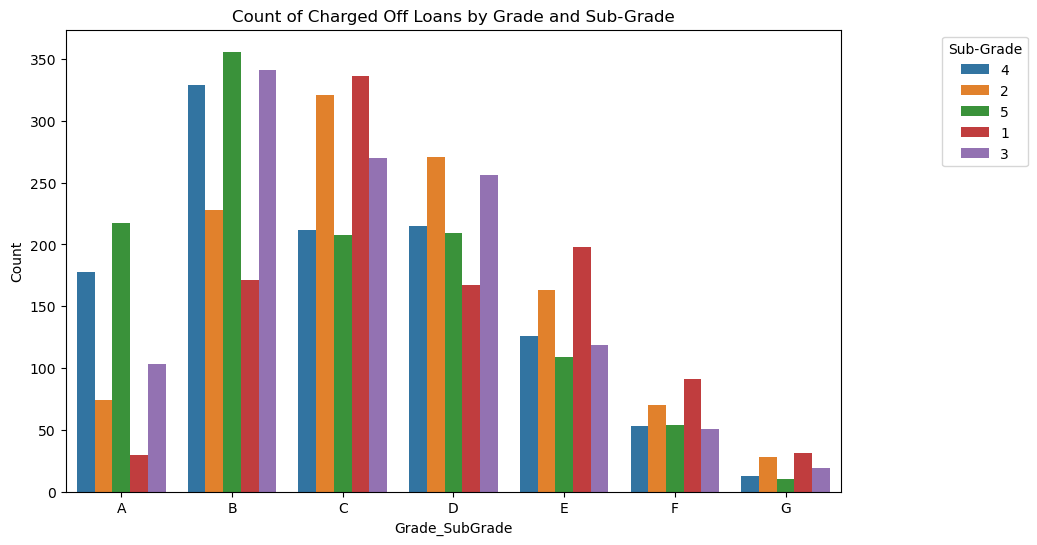

In [145]:
# now lets plot within each grade what is the count of charged off loans with respect to subgrade 
loan_data.sub_grade=loan_data.sub_grade.astype(str)
fig, ax = plt.subplots(figsize=(10,6))
sns.countplot(x = 'grade', order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'], hue = str('sub_grade'), data = loan_data[loan_data.loan_status == 'Charged Off'])
ax.set_title('Count of Charged Off Loans by Grade and Sub-Grade')
ax.set_xlabel('Grade_SubGrade')
ax.set_ylabel('Count')
ax.legend(loc='upper right', title='Sub-Grade', bbox_to_anchor=(1.25, 1))

<Axes: xlabel='grade', ylabel='count'>

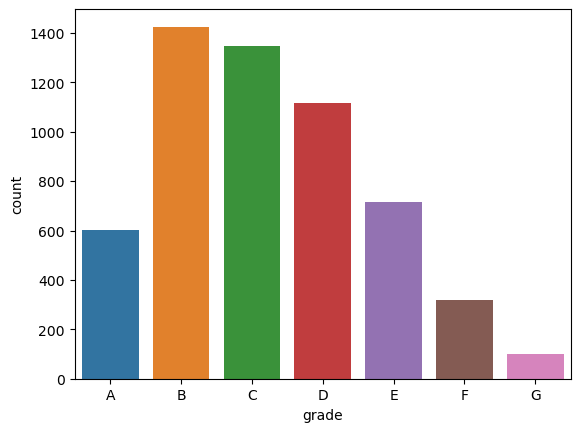

In [121]:
sns.countplot(x = 'grade', data = loan_data[loan_data.loan_status == 'Charged Off'], order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'])

### Observation :

* analysis on state and no of loans 

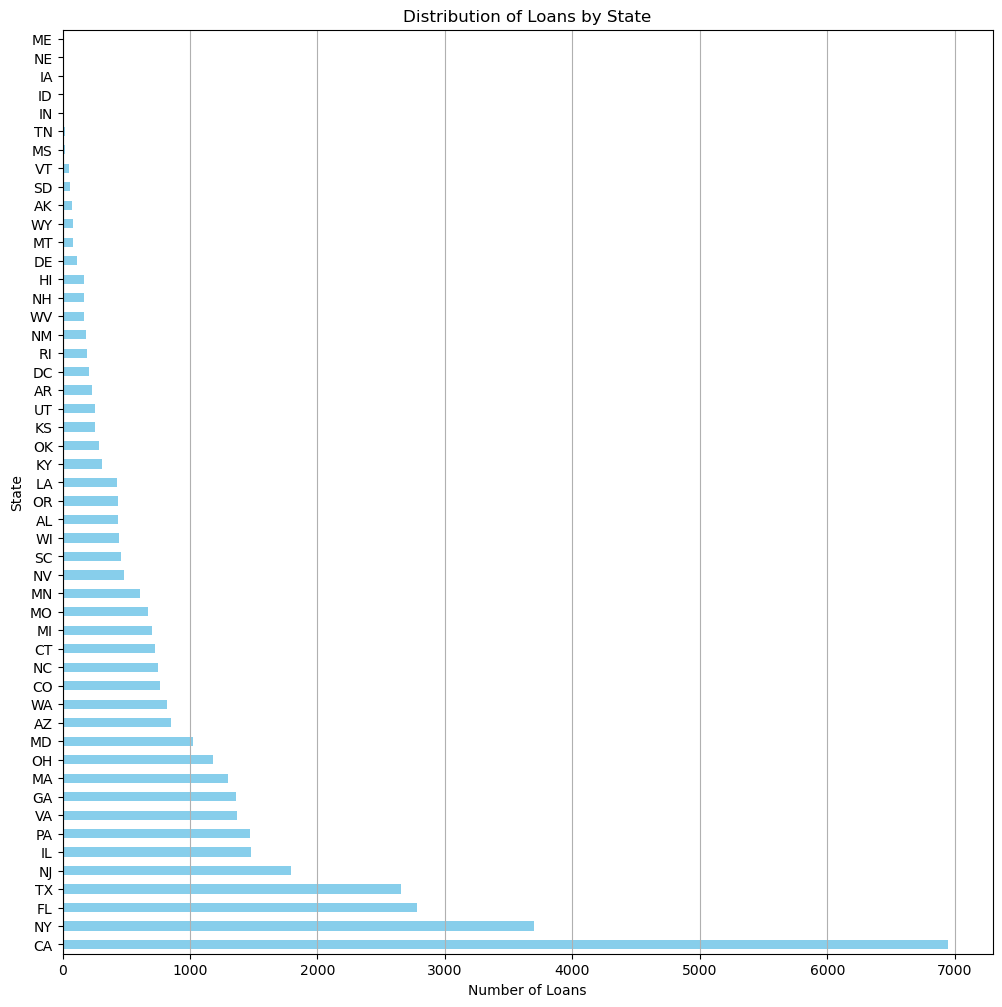

In [147]:
counts_state=loan_data['addr_state'].value_counts()
plt.figure(figsize=(12, 12))
counts_state.plot(kind='barh', color='skyblue')
plt.xlabel('Number of Loans')
plt.ylabel('State')
plt.title('Distribution of Loans by State')
plt.grid(axis='x')
plt.show()

### Observation :

* lets check porpose of loan against number of charged of loans 

<Axes: xlabel='count', ylabel='purpose'>

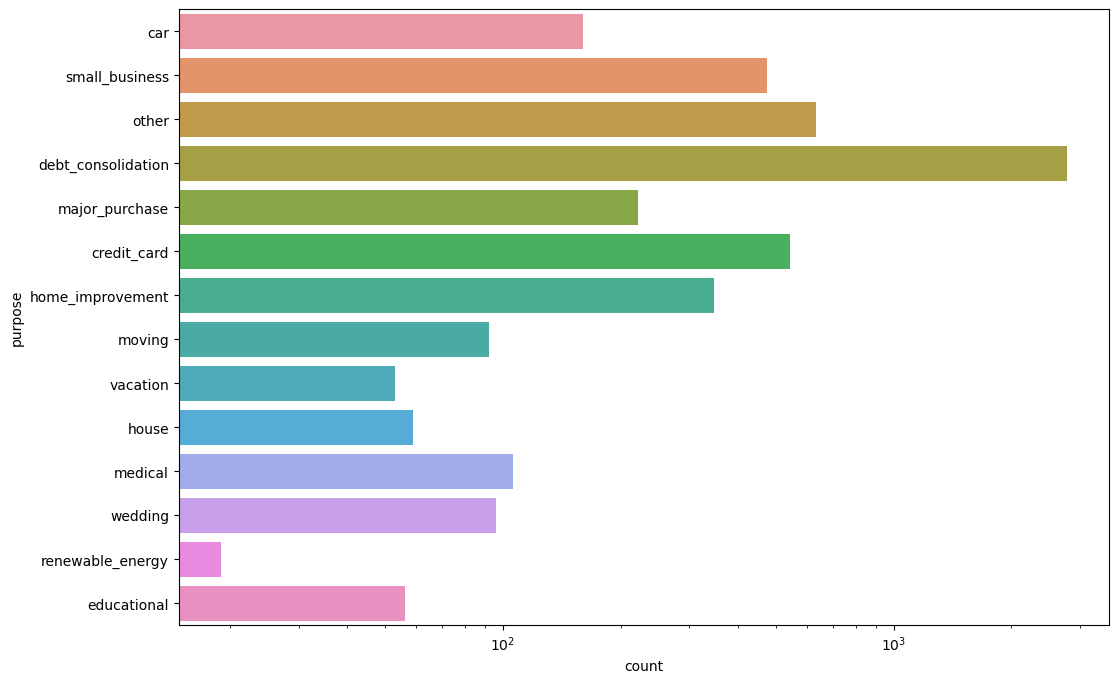

In [148]:
fig, ax = plt.subplots(figsize = (12,8))
ax.set(xscale = 'log')
sns.countplot(y ='purpose', data=loan_data[loan_data.loan_status == 'Charged Off'])

# Observation :

* Lets create bins for categorical analysis 

In [173]:
# Creating groups for interest rates
loan_data['intrate_group'] = pd.cut(loan_data['int_rate'], bins=5,precision =0,labels=['5%-9%','9%-13%','13%-17%','17%-21%','21%-24%'])

In [207]:
# creating bins for annual income
bin_edges = [3000, 31000, 58000, 85000, 112000, 600000]
loan_data['annualinc_group'] = pd.cut(loan_data['annual_inc'], bins=bin_edges, precision =0, labels =['3k-31k','31k-58k','59k-85k','85k-112k','112k-140k'])

In [209]:
# creating bins for annual  open account
loan_data['open_acc_groups'] = pd.cut(loan_data['open_acc'],bins = 5,precision =0,labels=['2-10','10-19','19-27','27-36','36-44'])

In [210]:
loan_data.open_acc_groups.value_counts()

open_acc_groups
2-10     25750
10-19    11432
19-27     1314
27-36       74
36-44        7
Name: count, dtype: int64

In [199]:
loan_data.annual_inc.min()

4000.0

In [206]:
loan_data.annualinc_group.value_counts()

annualinc_group
31k-58k      14001
59k-85k      11205
3k-31k        4758
85k-112k      4471
112k-140k     4094
Name: count, dtype: int64

Text(0.5, 0, 'Interest Rate')

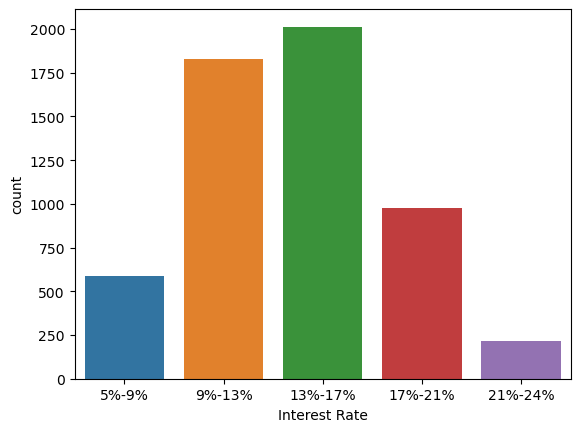

In [154]:
#lets check interate with interest rate groups
sns.countplot(x='intrate_group', data=loan_data[loan_data.loan_status == 'Charged Off'])
plt.xlabel('Interest Rate')

### Observation :

<Axes: xlabel='emp_length', ylabel='count'>

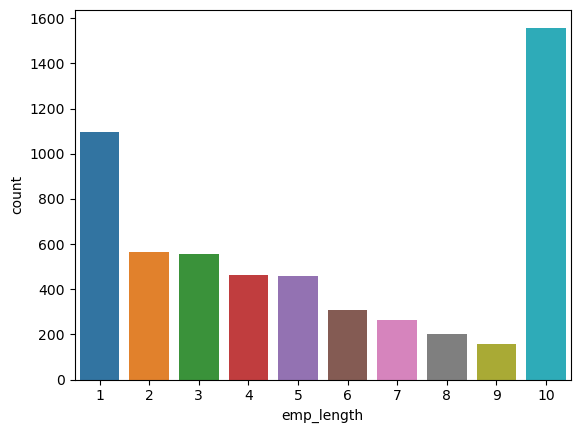

In [168]:
#lets check employment length  with loan defaulters
sns.countplot(x='emp_length', data=loan_data[loan_data.loan_status=='Charged Off'])

### Observation :

<Axes: xlabel='annualinc_group', ylabel='count'>

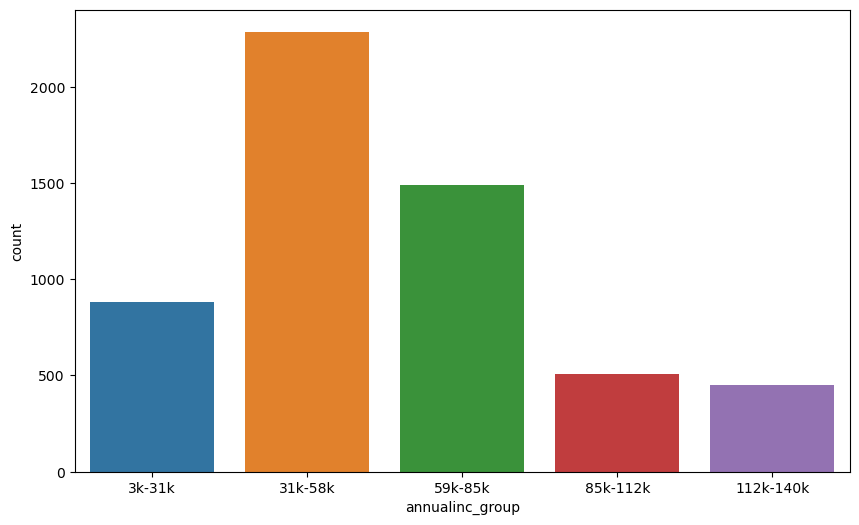

In [208]:
#lets check annual income  with loan defaulters
fig, ax = plt.subplots(figsize = (10,6))
sns.countplot(x='annualinc_group', data=loan_data[loan_data.loan_status=='Charged Off'])

### Observation :

<Axes: xlabel='open_acc_groups', ylabel='count'>

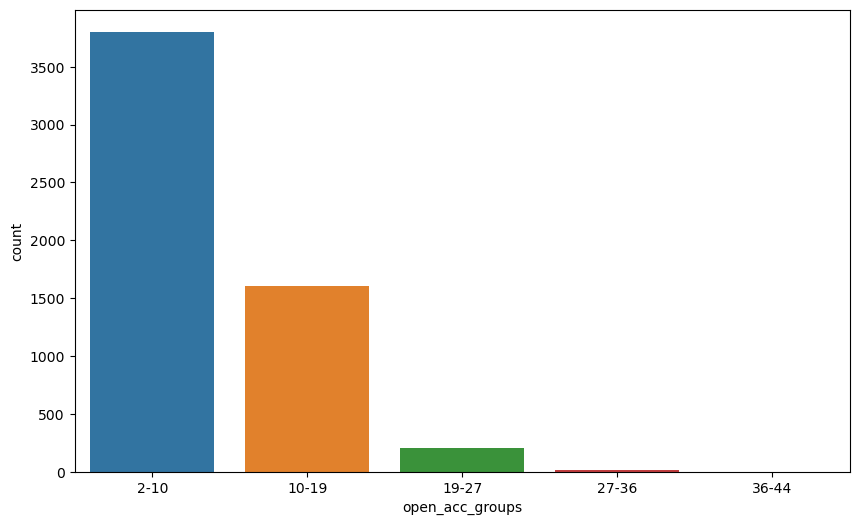

In [213]:
#lets check no of accounts  with loan defaulters
fig, ax = plt.subplots(figsize = (10,6))
sns.countplot(x='open_acc_groups', data=loan_data[loan_data.loan_status=='Charged Off'])

### Observation :

In [ ]:
#lets check verification status with loan defaulters

<Axes: xlabel='verification_status', ylabel='count'>

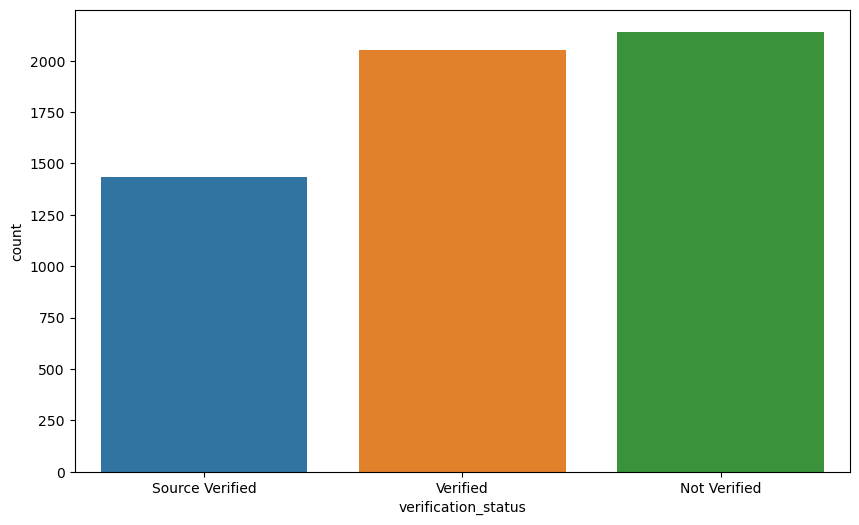

In [220]:
fig, ax = plt.subplots(figsize = (10,6))
sns.countplot(x='verification_status', data=loan_data[loan_data.loan_status=='Charged Off'])

### Observation :

# Bivariate Analysis

* lets check relationship with annual income and non defaulters 

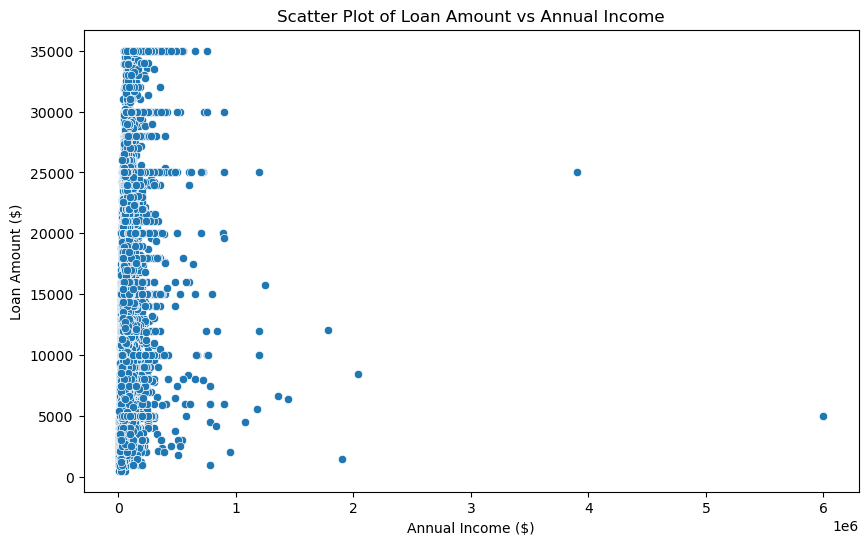

In [229]:
plt.figure(figsize=(10, 6))

sns.scatterplot(x='annual_inc', y='loan_amnt', data=loan_data)

plt.title('Scatter Plot of Loan Amount vs Annual Income')
plt.xlabel('Annual Income ($)')
plt.ylabel('Loan Amount ')

plt.show()

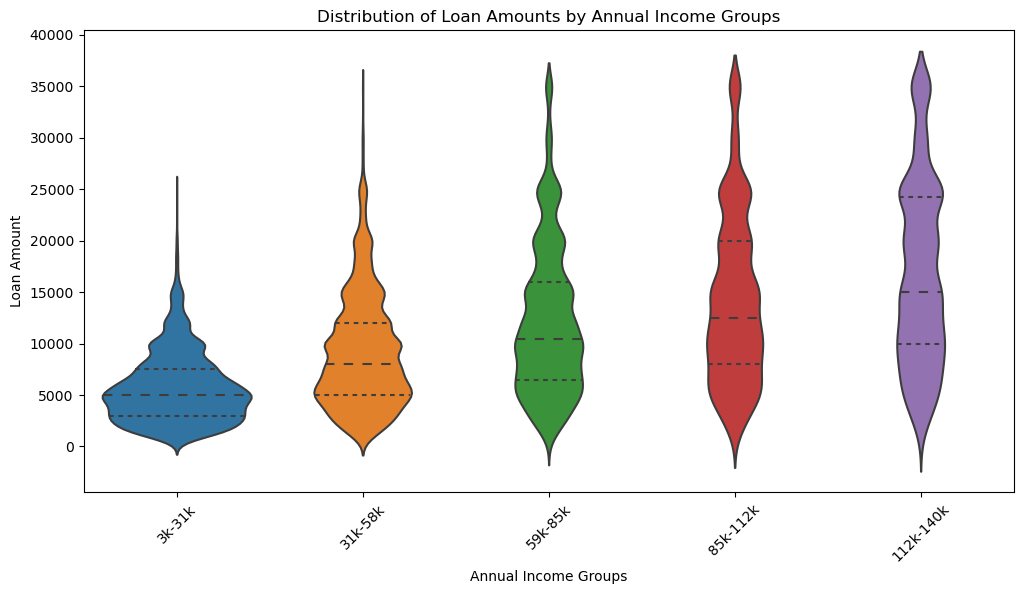

In [232]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='annualinc_group', y='loan_amnt', data=loan_data, inner='quartile')
plt.title('Distribution of Loan Amounts by Annual Income Groups')
plt.xlabel('Annual Income Groups')
plt.ylabel('Loan Amount')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.show()

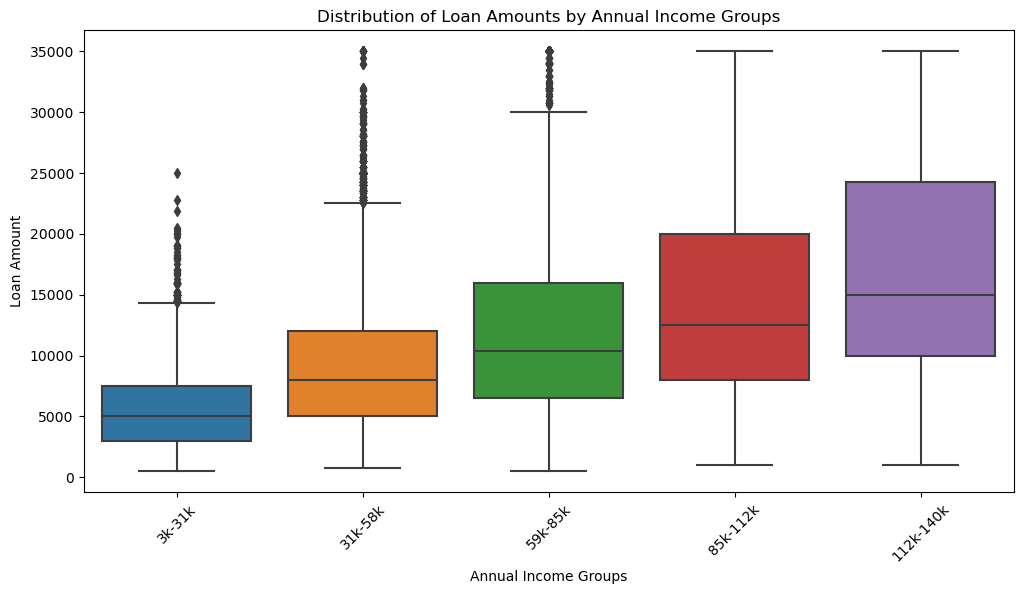

In [233]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='annualinc_group', y='loan_amnt', data=loan_data)
plt.title('Distribution of Loan Amounts by Annual Income Groups')
plt.xlabel('Annual Income Groups')
plt.ylabel('Loan Amount')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.show()

# Correlation

In [235]:
for i in numerical_columns:
    loan_data[i]=loan_data[i].astype("int")

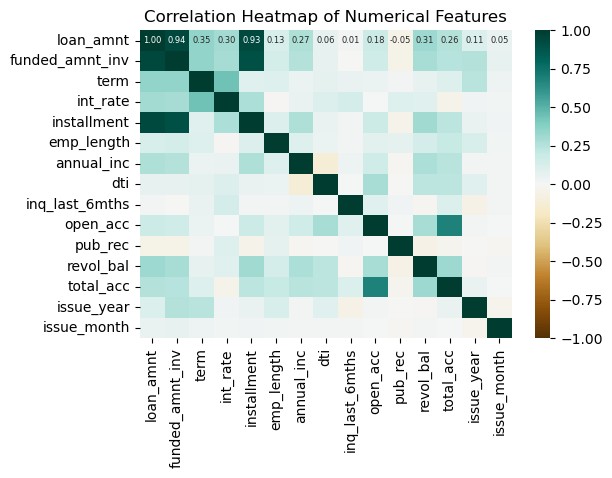

In [271]:
numerical_col=['loan_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment',
       'emp_length', 'annual_inc', 'dti', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'total_acc',
        'issue_year', 'issue_month']
numerical_data = loan_data[numerical_col]
# Calculate correlation matrix
correlation_matrix = numerical_data.corr()
sns.reset_defaults()
# Create a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='BrBG',fmt=".2f", vmin=-1, vmax=1,annot_kws={"size": 6})
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

### Observations:

# Final deduction and recomendations
**Here are the recommendations for lenders:**

*Interest Rate and Employment Length:* - interest rate with 13-17% and employment length with 10+ are more likely to default

*Grade and Sub-Grade:* - Grade B and subgrade B5 are most likely defaulters

*Loan Purpose:* - Loans for debt consolidation are high risky , need thorough analysis of capacity of applicant before approving.

*Geographical Considerations:* - most loan applicants  are  from CA so focus on more applicants from other states.

*Negative correlations:* Between loan amount and public record bankruptcies, as well as between annual income and DTI, indicate risk. Analyze these correlations for red flags.

*Verification Status:*-Loans with "Not Verified" status more reskier

*Loan Term:-* Loans with 60-month terms default more than those with 36-month terms. Assess the borrower's ability to repay over the loan term.

*Strong Correlation*:-loan term and amount, and between term and interest rate, impact defaults. Consider these when structuring loans.

 **above observation will be useful for lenders to approve or reject loans**

In [249]:
loan_data.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,out_prncp_inv,total_pymnt_inv,total_rec_late_fee,recoveries,collection_recovery_fee,issue_year,issue_month,intrate_group,annualinc_group,open_acc_groups,loan_status_jitter,loan_status_encoded
0,5000,4975,36,10,162,B,2,10,RENT,24000,Verified,2011-12-01,Fully Paid,credit_card,AZ,27,0,1,3,0,13648,9,0,5833,0,0,0,2011,12,9%-13%,3k-31k,2-10,0.915901,1
1,2500,2500,60,15,59,C,4,1,RENT,30000,Source Verified,2011-12-01,Charged Off,car,GA,1,0,5,3,0,1687,4,0,1008,0,117,1,2011,12,13%-17%,3k-31k,2-10,-0.070249,0
2,2400,2400,36,15,84,C,5,10,RENT,12252,Not Verified,2011-12-01,Fully Paid,small_business,IL,8,0,2,2,0,2956,10,0,3005,0,0,0,2011,12,13%-17%,3k-31k,2-10,1.022317,1
3,10000,10000,36,13,339,C,1,10,RENT,49200,Source Verified,2011-12-01,Fully Paid,other,CA,20,0,1,10,0,5598,37,0,12231,16,0,0,2011,12,13%-17%,31k-58k,2-10,1.037713,1
5,5000,5000,36,7,156,A,4,3,RENT,36000,Source Verified,2011-12-01,Fully Paid,wedding,AZ,11,0,3,9,0,7963,12,0,5632,0,0,0,2011,12,5%-9%,31k-58k,2-10,0.914349,1


In [222]:
loan_data.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,out_prncp_inv,total_pymnt_inv,total_rec_late_fee,recoveries,collection_recovery_fee,issue_year,issue_month,intrate_group,annualinc_group,open_acc_groups
0,5000,4975.0,36,10.65,162.87,B,2,10,RENT,24000.0,Verified,2011-12-01,Fully Paid,credit_card,AZ,27.65,0,1,3,0,13648,9,0.0,5833.84,0.00,0.00,0.00,2011,12,9%-13%,3k-31k,2-10
1,2500,2500.0,60,15.27,59.83,C,4,1,RENT,30000.0,Source Verified,2011-12-01,Charged Off,car,GA,1.00,0,5,3,0,1687,4,0.0,1008.71,0.00,117.08,1.11,2011,12,13%-17%,3k-31k,2-10
2,2400,2400.0,36,15.96,84.33,C,5,10,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,small_business,IL,8.72,0,2,2,0,2956,10,0.0,3005.67,0.00,0.00,0.00,2011,12,13%-17%,3k-31k,2-10
3,10000,10000.0,36,13.49,339.31,C,1,10,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,other,CA,20.00,0,1,10,0,5598,37,0.0,12231.89,16.97,0.00,0.00,2011,12,13%-17%,31k-58k,2-10
5,5000,5000.0,36,7.90,156.46,A,4,3,RENT,36000.0,Source Verified,2011-12-01,Fully Paid,wedding,AZ,11.20,0,3,9,0,7963,12,0.0,5632.21,0.00,0.00,0.00,2011,12,5%-9%,31k-58k,2-10


In [ ]:
Column_full_null

In [ ]:
#